# Ici on évalue les deux modèles précédents sur des images floutées pour se faire une idée de la robustesse des dits modèles

In [46]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

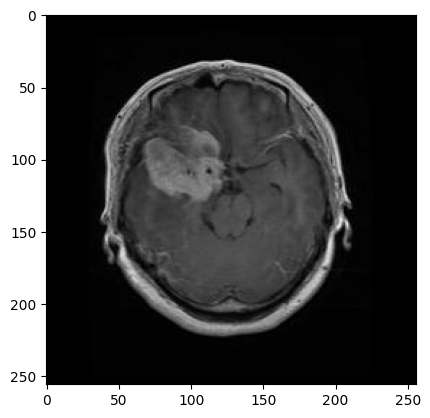

In [ ]:
# Charger l'image
image = cv2.imread('../data_set/train/yes/y_10.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image) 
plt.show() 

L'image ci dessus est celle de l'IRM d'un cerveau atteint malade.

Nous allons maintenant appliqué des filtres de floutage sur nos données.

Flou Gaussien

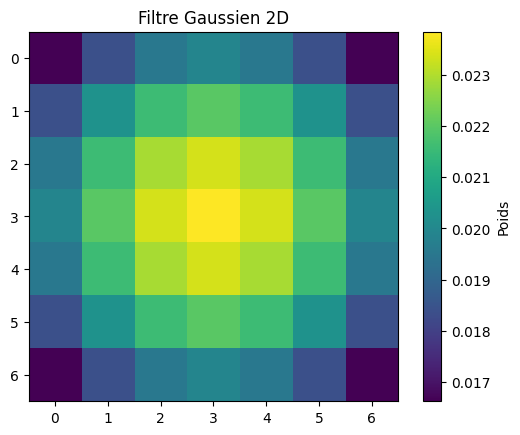

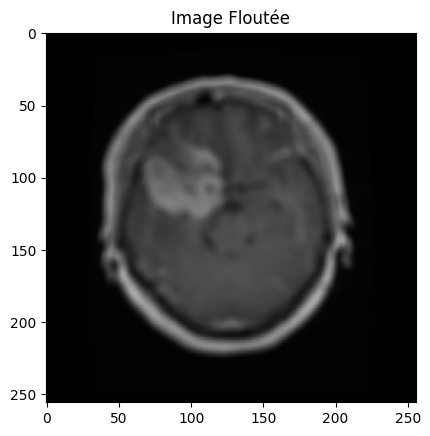

In [43]:
# Paramètres
kernel_size = 7  # Taille du filtre 5x5
sigmaX = 5.0     # Écart-type sur l'axe X 
sigmaY = 5.0     # Écart-type sur l'axe Y 

#flou gaussien 2D
gaussian_blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigmaX=sigmaX, sigmaY=sigmaY)

# Affichage du filtre gaussien 2D
gaussian_filter_2d = cv2.getGaussianKernel(kernel_size, sigmaX)
gaussian_filter_2d = np.outer(gaussian_filter_2d, gaussian_filter_2d)

#le filtre
plt.imshow(gaussian_filter_2d, cmap='viridis', interpolation='nearest')
plt.colorbar(label="Poids")
plt.title("Filtre Gaussien 2D")
plt.show()

#l'image floutée
plt.imshow(gaussian_blurred, cmap='gray')
plt.title("Image Floutée")
plt.show()


La première image est celle d'un du filtre d'un flou gaussien et la deuxième est le résultat obtenu après avoir appliqué ce filtre à l'image précédente du cerveau malade

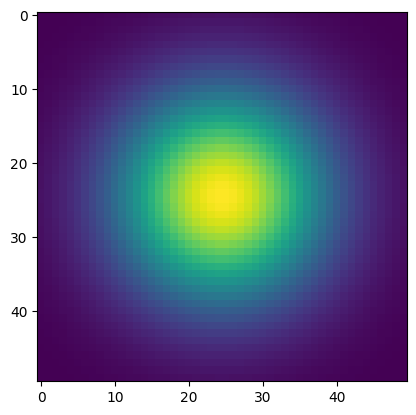

In [27]:
kernel_size = 50 
sigma = 10.0      

gaussian_filter = cv2.getGaussianKernel(ksize=kernel_size, sigma=sigma)
gaussian_filter_2d = np.outer(gaussian_filter, gaussian_filter)  
plt.imshow(gaussian_filter_2d, cmap='viridis', interpolation='nearest')
plt.show()


Voici de plus loin à quoi ressemble un filtre gaussien 2D. De manière intuitive c'est comme une diffusion (distribution de nombre )dont la source est placée au centre de l'image.

Flou moyen

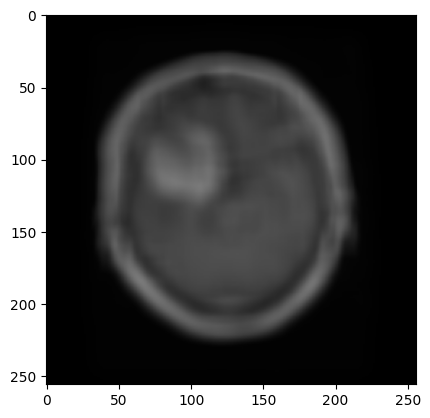

In [28]:
mean_blurred = cv2.blur(image, (15, 15))
plt.imshow(mean_blurred)
plt.show()

Flou médian

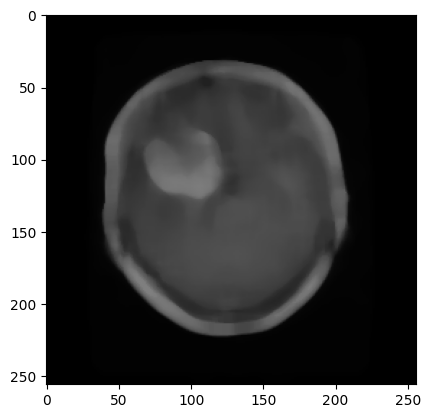

In [ ]:
median_blurred = cv2.medianBlur(image, 15)
plt.imshow(median_blurred)
plt.show()

Flou bilatéral

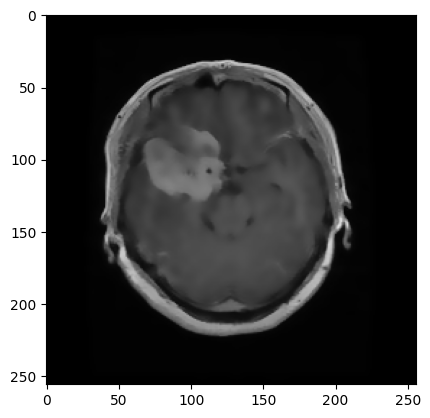

In [46]:
bilateral_blurred = cv2.bilateralFilter(image, 9, 75, 75)
plt.imshow(bilateral_blurred)
plt.show()

Flou simple personnalisé.

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


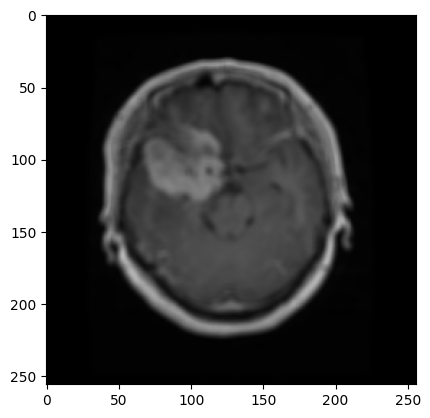

In [ ]:
# Créer un noyau de flou (moyenne)
kernel = np.ones((5, 5), np.float32) / 25
print(kernel)
# Appliquer le noyau à l'image
blurred = cv2.filter2D(image, -1, kernel)
plt.imshow(blurred)
plt.show()


La fonction qui suit va nous servir à flouter des images labelisées contenues dans un dossiers 

In [16]:
import random
def apply_random_filter(input_dir):
    """
    Applique un filtre choisi aléatoirement sur chaque image .jpg du répertoire donné.

    Args:
        input_dir (str): Chemin vers le répertoire contenant les images.
    """
    # Créer un répertoire pour les images transformées
    output_dir = os.path.join(input_dir, "blured")
    os.makedirs(output_dir, exist_ok=True)

    # Parcourir les fichiers dans le répertoire
    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg"):
            filepath = os.path.join(input_dir, filename)
            image = cv2.imread(filepath)

            if image is None:
                print(f"Impossible de lire {filename}. Ignoré.")
                continue

            # Liste des transformations possibles
            filters = [
                lambda img: cv2.GaussianBlur(img, (7, 7), sigmaX=5.0, sigmaY=5.0),
                lambda img: cv2.blur(img, (15, 15)),
                lambda img: cv2.medianBlur(img, 15),
                lambda img: cv2.bilateralFilter(img, 9, 75, 75),
                lambda img: cv2.filter2D(img, -1, np.ones((5, 5), np.float32) / 25),
            ]

            # Choisir une transformation aléatoire
            selected_filter = random.choice(filters)
            transformed_image = selected_filter(image)

            # Enregistrer l'image transformée
            output_path = os.path.join(output_dir, f"blurred_{filename}")
            cv2.imwrite(output_path, transformed_image)
            print(f"Image transformée enregistrée : {output_path}")



In [17]:
input_dir = "../data_set/new_data/Training/glioma_tumor"
apply_random_filter(input_dir)

Image transformée enregistrée : ../data_set/new_data/Training/glioma_tumor/blured/blurred_g37.jpg
Image transformée enregistrée : ../data_set/new_data/Training/glioma_tumor/blured/blurred_g674.jpg
Image transformée enregistrée : ../data_set/new_data/Training/glioma_tumor/blured/blurred_g228.jpg
Image transformée enregistrée : ../data_set/new_data/Training/glioma_tumor/blured/blurred_g773.jpg
Image transformée enregistrée : ../data_set/new_data/Training/glioma_tumor/blured/blurred_g643.jpg
Image transformée enregistrée : ../data_set/new_data/Training/glioma_tumor/blured/blurred_g711.jpg
Image transformée enregistrée : ../data_set/new_data/Training/glioma_tumor/blured/blurred_g685.jpg
Image transformée enregistrée : ../data_set/new_data/Training/glioma_tumor/blured/blurred_g380.jpg
Image transformée enregistrée : ../data_set/new_data/Training/glioma_tumor/blured/blurred_g152.jpg
Image transformée enregistrée : ../data_set/new_data/Training/glioma_tumor/blured/blurred_g802.jpg
Image trans

In [18]:
input_dir = "../data_set/new_data/Training/meningioma_tumor"
apply_random_filter(input_dir)

Image transformée enregistrée : ../data_set/new_data/Training/meningioma_tumor/blured/blurred_m198.jpg
Image transformée enregistrée : ../data_set/new_data/Training/meningioma_tumor/blured/blurred_m500.jpg
Image transformée enregistrée : ../data_set/new_data/Training/meningioma_tumor/blured/blurred_m563.jpg
Image transformée enregistrée : ../data_set/new_data/Training/meningioma_tumor/blured/blurred_m795.jpg
Image transformée enregistrée : ../data_set/new_data/Training/meningioma_tumor/blured/blurred_m241.jpg
Image transformée enregistrée : ../data_set/new_data/Training/meningioma_tumor/blured/blurred_m659.jpg
Image transformée enregistrée : ../data_set/new_data/Training/meningioma_tumor/blured/blurred_m737.jpg
Image transformée enregistrée : ../data_set/new_data/Training/meningioma_tumor/blured/blurred_m536.jpg
Image transformée enregistrée : ../data_set/new_data/Training/meningioma_tumor/blured/blurred_m628.jpg
Image transformée enregistrée : ../data_set/new_data/Training/meningioma_

In [19]:
input_dir = "../data_set/new_data/Training/no_tumor"
apply_random_filter(input_dir)

Image transformée enregistrée : ../data_set/new_data/Training/no_tumor/blured/blurred_image (25).jpg
Image transformée enregistrée : ../data_set/new_data/Training/no_tumor/blured/blurred_image(62).jpg
Image transformée enregistrée : ../data_set/new_data/Training/no_tumor/blured/blurred_image(198).jpg
Image transformée enregistrée : ../data_set/new_data/Training/no_tumor/blured/blurred_image(208).jpg
Image transformée enregistrée : ../data_set/new_data/Training/no_tumor/blured/blurred_image (32).jpg
Image transformée enregistrée : ../data_set/new_data/Training/no_tumor/blured/blurred_image(138).jpg
Image transformée enregistrée : ../data_set/new_data/Training/no_tumor/blured/blurred_image(129).jpg
Image transformée enregistrée : ../data_set/new_data/Training/no_tumor/blured/blurred_image (51).jpg
Image transformée enregistrée : ../data_set/new_data/Training/no_tumor/blured/blurred_image(294).jpg
Image transformée enregistrée : ../data_set/new_data/Training/no_tumor/blured/blurred_image 

In [20]:
input_dir = "../data_set/new_data/Training/pituitary_tumor"
apply_random_filter(input_dir)

Image transformée enregistrée : ../data_set/new_data/Training/pituitary_tumor/blured/blurred_p654.jpg
Image transformée enregistrée : ../data_set/new_data/Training/pituitary_tumor/blured/blurred_p192.jpg
Image transformée enregistrée : ../data_set/new_data/Training/pituitary_tumor/blured/blurred_p643.jpg
Image transformée enregistrée : ../data_set/new_data/Training/pituitary_tumor/blured/blurred_p132.jpg
Image transformée enregistrée : ../data_set/new_data/Training/pituitary_tumor/blured/blurred_p792.jpg
Image transformée enregistrée : ../data_set/new_data/Training/pituitary_tumor/blured/blurred_p398.jpg
Image transformée enregistrée : ../data_set/new_data/Training/pituitary_tumor/blured/blurred_p765.jpg
Image transformée enregistrée : ../data_set/new_data/Training/pituitary_tumor/blured/blurred_p791.jpg
Image transformée enregistrée : ../data_set/new_data/Training/pituitary_tumor/blured/blurred_p558.jpg
Image transformée enregistrée : ../data_set/new_data/Training/pituitary_tumor/blur

In [21]:
import sys
sys.path.append('../')  # Ajouter le répertoire parent au sys.path
print(sys.path)
import models.model_resnet18  # Maintenant on peut importer le fichier models.py

['/home/ing/Bureau/Bureau_/projets_personnels/brain_cancer/notebooks', '/home/ing/Bureau/Bureau_/Udem_concerns/Science_de_donnees_MILA/Projet_finale/milestone_2/ift6758-project-milestone2', '/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python39.zip', '/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9', '/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/lib-dynload', '', '/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/site-packages', '/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/site-packages/setuptools/_vendor', '../', '/tmp/tmph7a9669q', '../']


In [22]:
# Initialiser le nouveau modèle
model_fine = models.model_resnet18.CustomResNetClassifier(pretrained=True)  #Resnet18 préentrainé sur imagenet

/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [23]:
# Charger les poids sauvegardés
model_fine.load_state_dict(torch.load("../saved_models/model_fine_resnet18.pth"))
# Vérification : afficher la structure du modèle
print(model_fine)

CustomResNetClassifier(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=T

/tmp/ipykernel_26969/3871262359.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_fine.load_state_dict(torch.load("../saved_models/model_fine_resnet18.pth"))


In [24]:
def evaluate_2(model, test_data_path, criterion, transform, batch_size, device):
    """
    Fonction pour évaluer un modèle sur des données de test.

    Args:
        model: Le modèle PyTorch à évaluer.
        test_data_path: Chemin vers les données de test.
        criterion: Fonction de perte utilisée (par exemple, nn.CrossEntropyLoss()).
        transform: Transformations à appliquer aux données (par exemple, redimensionnement, normalisation).
        batch_size: Taille des lots pour l'évaluation.
        device: Dispositif d'exécution ('cuda' ou 'cpu').

    Returns:
        average_test_loss: Perte moyenne sur les données de test.
        test_accuracy: Précision moyenne sur les données de test.
        all_outputs: Liste des sorties du modèle.
        all_predictions: Liste des prédictions du modèle.
    """

    # Charger les données de test
    test_data = datasets.ImageFolder(root=test_data_path, transform=transform)

    # Créer un DataLoader pour les données de test
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    # Mettre le modèle en mode évaluation
    model.eval()

    # Variables pour calculer la perte et la précision
    test_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    all_outputs = []
    all_predictions = []
    all_labels = []
    # Désactiver la rétropropagation
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Déplacer les données vers l'appareil

            # Propagation avant
            outputs = model(inputs)
            all_outputs.append(outputs)  # Accumuler les sorties

            # Calcul de la perte
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Prédictions : indices des classes avec les plus grandes probabilités
            _, predicted = torch.max(outputs, 1)
            all_predictions.append(predicted)  # Accumuler les prédictions

            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
            all_labels.append(labels)

    # Calcul des métriques
    average_test_loss = test_loss / len(test_loader)
    test_accuracy = correct_predictions / total_predictions

    # Concaténer les sorties et prédictions en un seul tenseur
    all_outputs = torch.cat(all_outputs, dim=0).cpu()
    all_predictions = torch.cat(all_predictions, dim=0).cpu()

    print(f'Perte sur le jeu de test: {average_test_loss:.4f}')
    print(f'Précision sur le jeu de test: {test_accuracy:.4f}')

    return average_test_loss, test_accuracy, all_labels, all_outputs, all_predictions


In [28]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Redimensionner l'image à 256x256
    transforms.ToTensor(),  # Convertir l'image en un tensor PyTorch
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalisation
])

In [30]:
test_data_path = "../data_set/new_data/Training/blurred"
criterion = nn.CrossEntropyLoss()
transform = transform
batch_size = 90
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Charger les données d'entraînement
test_data = datasets.ImageFolder(root=test_data_path, transform=transform)

# Créer un DataLoader pour itérer sur les données par mini-lots
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
print(test_data[0])

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -

In [31]:
average_test_loss, test_accuracy,all_labels, all_outputs, all_predictions = evaluate_2(model_fine, test_data_path, criterion, transform, batch_size, device)

Perte sur le jeu de test: 1.2890
Précision sur le jeu de test: 0.7972


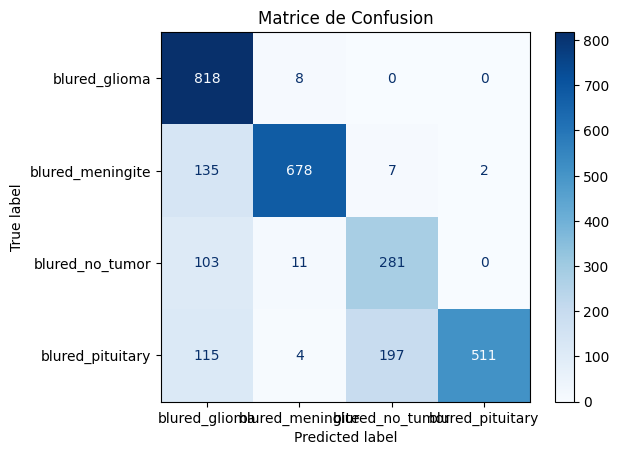

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convertir les étiquettes et les prédictions en un seul tableau
true_labels = torch.cat(all_labels, dim=0).cpu().numpy()
predicted_labels = all_predictions.numpy()

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_data.classes)
disp.plot(cmap=plt.cm.Blues)  # Utilisation d'un schéma de couleurs
plt.title("Matrice de Confusion")
plt.show()


On peut voir que le modèle classe très bien les images des cerveaux atteints du glioma et plutot bien les images des cerveaux atteints de la méningite.

In [42]:
# Initialiser le nouveau modèle
model_not_fine = models.model_resnet18.CustomResNetClassifier(pretrained=True)  #Resnet18 préentrainé sur imagenet

/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [43]:
# Charger les poids sauvegardés
model_not_fine.load_state_dict(torch.load("../saved_models/model_not_fine_resnet18.pth"))
# Vérification : afficher la structure du modèle
print(model_fine)

CustomResNetClassifier(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=T

/tmp/ipykernel_26969/604190783.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_not_fine.load_state_dict(torch.load("../saved_models/model_not_fine_resnet18.pth"))


In [44]:
average_test_loss, test_accuracy,all_labels, all_outputs, all_predictions = evaluate_2(model_not_fine, test_data_path, criterion, transform, batch_size, device)

Perte sur le jeu de test: 1.3164
Précision sur le jeu de test: 0.6199


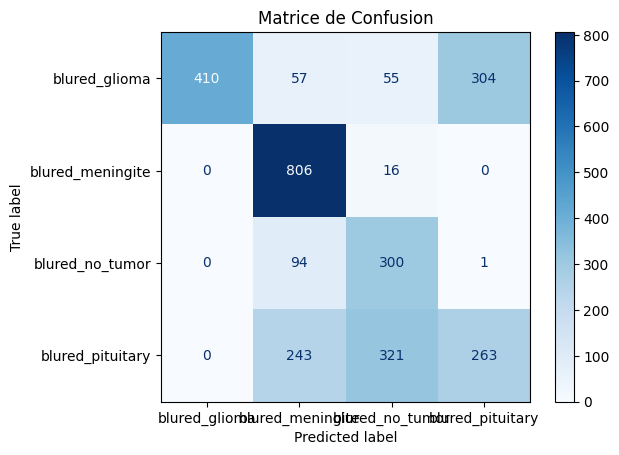

In [45]:
true_labels = torch.cat(all_labels, dim=0).cpu().numpy()
predicted_labels = all_predictions.numpy()

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_data.classes)
disp.plot(cmap=plt.cm.Blues)  # Utilisation d'un schéma de couleurs
plt.title("Matrice de Confusion")
plt.show()


Ici on peut voir que dans l'ensemble le modele fine reste toujours meilleurs sur les données bruitées. Sauf le seul cas des images de cerveaux atteints de la méningite où le modèle non entrainé sur la classification des données binaire est quand meme beaucoup plus performant que le modèle précédent